In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

In [2]:
np.random.seed(3)

In [3]:
bukayo = "buyakosaka.xlsx"
df = pd.read_excel(bukayo)
column_data = df.iloc[:, 0].tolist()
print(column_data)

[0, 0, 0, 1, 0, 2, 2, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 3, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0]


In [4]:
def calculate_transition_percentages(numbers):
    transitions = {}

    for i in range(len(numbers) - 1):
        current_number = numbers[i]
        next_number = numbers[i + 1]

        if current_number not in transitions:
            transitions[current_number] = {}

        if next_number not in transitions[current_number]:
            transitions[current_number][next_number] = 0

        transitions[current_number][next_number] += 1

    percentages = {}

    for current_number, next_numbers in transitions.items():
        total_transitions = sum(next_numbers.values())
        percentages[current_number] = {}

        for next_number, count in next_numbers.items():
            percentage = (count / total_transitions) * 100
            percentages[current_number][next_number] = percentage

    return percentages

In [5]:
transition_percentages = calculate_transition_percentages(column_data)
print(transition_percentages)

{0: {0: 69.23076923076923, 1: 28.205128205128204, 2: 2.564102564102564}, 1: {0: 68.75, 1: 25.0, 3: 6.25}, 2: {2: 50.0, 1: 50.0}, 3: {0: 100.0}}


In [6]:
StatesGoalsData = ['None','Once','Twice','Hat-Trick']

In [7]:
transition_states = [
    ['None-to-None', 'None-to-Once', 'None-to-Twice', 'None-to-Hat-Trick'],
    ['Once-to-None', 'Once-to-Once', 'Once-to-Twice', 'Once-to-Hat-Trick'],
    ['Twice-to-None', 'Twice-to-Once', 'Twice-to-Twice', 'Twice-to-Hat-Trick'],
    ['Hat-Trick-to-None', 'Hat-Trick-to-Once', 'Hat-Trick-to-Twice', 'Hat-Trick-to-Hat-Trick']
]
transition_matrix = [
    [0.6923, 0.2821, 0.02560, 0],
    [0.6875, 0.25, 0, 0.0625],
    [0, 0.5, 0.5, 0],
    [1, 0, 0, 0]
]

In [8]:
ScoringProcess = list()
NumMatches = 100
if column_data[0] == 0:
    InitialState = "None"
elif column_data[0] == 1:
    InitialState = "Once"
elif column_data[0] == 2:
    InitialState = "Twice"
else:
    InitialState = "Hat-Trick"
print('Recent match result =',InitialState)

Recent match result = None


In [9]:
for i in range(0, NumMatches):
    if InitialState == 'None':
        TransCondition = np.random.choice(transition_states[0],replace=True,p=transition_matrix[0])
        if TransCondition == 'None-to-None':
            pass
        elif TransCondition == 'None-to-Once':
            InitialState = 'Once'
        elif TransCondition == 'None-to-Twice':
            InitialState = 'Twice'
        else:
            InitialState = 'Hat-Trick'
    elif InitialState == 'Once':
        TransCondition = np.random.choice(transition_states[1],replace=True,p=transition_matrix[1])
        if TransCondition == 'Once-to-Once':
            pass
        elif TransCondition == 'Once-to-None':
            InitialState = 'None'
        elif TransCondition == 'Once-to-Twice':
            InitialState = 'Twice'
        else:
            InitialState = 'Hat-Trick'
    elif InitialState == 'Twice':
        TransCondition = np.random.choice(transition_states[2],replace=True,p=transition_matrix[2])
        if TransCondition == 'Twice-to-Twice':
            pass
        elif TransCondition == 'Twice-to-None':
            InitialState = 'None'
        elif TransCondition == 'Twice-to-Once':
            InitialState = 'Once'
        else:
            InitialState = 'Hat-Trick'
    elif InitialState == 'Hat-Trick':
        TransCondition = np.random.choice(transition_states[3],replace=True,p=transition_matrix[3])
        if TransCondition == 'Hat-Trick-to-Hat-Trick':
            pass
        elif TransCondition == 'Hat-Trick-to-None':
            InitialState = 'None'
        elif TransCondition == 'Hat-Trick-to-Once':
            InitialState = 'Once'
        else:
            InitialState = 'Twice'
            
    ScoringProcess.append(InitialState)
    print(InitialState)

None
Once
None
None
Once
Once
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
Once
None
None
None
Once
None
None
None
Once
Hat-Trick
None
Once
Once
None
None
None
None
None
None
None
None
None
None
None
Once
None
None
None
None
None
None
None
None
None
None
Once
Once
Once
Once
None
None
None
None
None
None
None
None
Once
None
None
None
Once
None
None
None
None
None
None
None
None
None
None
Once
None
None
Once
None
Once
Once
Once
None
Once
Once
None
Once
None
None
None
None


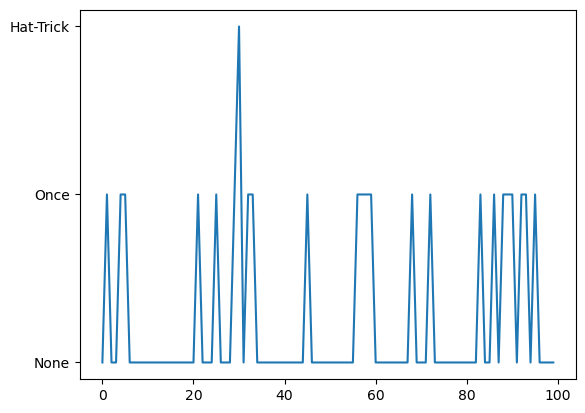

In [10]:
plt.plot(ScoringProcess)
plt.show()

In [20]:
import networkx as nx
import matplotlib.pyplot as plt
import random

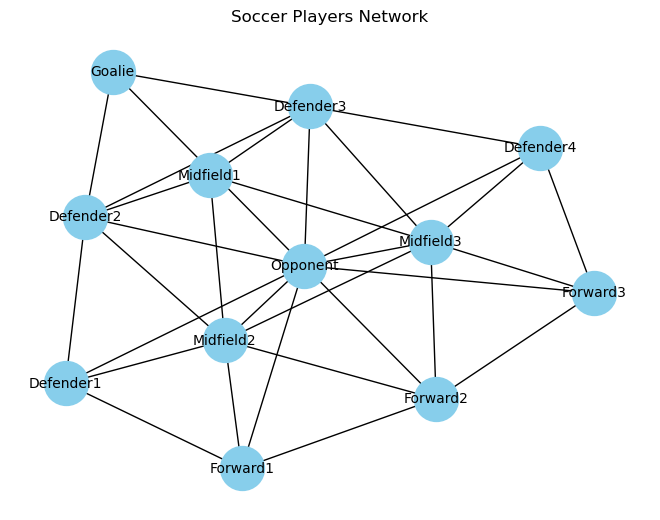

In [12]:
# Create an empty graph
G = nx.Graph()

# Add players as nodes (you can replace these with actual player names or IDs)
players = ["Opponent", "Goalie", "Defender1", "Defender2", "Defender3", "Defender4", "Midfield1", "Midfield2", "Midfield3", "Forward1", "Forward2", "Forward3"]
G.add_nodes_from(players)
# Define the connections (edges) between players
connections = [
    ("Goalie", "Opponent"), ("Goalie", "Defender2"), ("Goalie", "Defender3"),
    ("Defender1", "Opponent"), ("Defender1", "Forward1"), ("Defender1", "Midfield2"), ("Defender1", "Defender2"),
    ("Defender2", "Opponent"), ("Defender2", "Goalie"), ("Defender2", "Defender1"), ("Defender2", "Defender3"), ("Defender2", "Midfield1"), ("Defender2", "Midfield2"),
    ("Defender3", "Opponent"), ("Defender3", "Goalie"), ("Defender3", "Defender2"), ("Defender3", "Defender4"), ("Defender3", "Midfield1"), ("Defender3", "Midfield3"), 
    ("Defender4", "Opponent"), ("Defender4", "Midfield3"), ("Defender4", "Forward3"),
    ("Defender4", "Opponent"), ("Midfield1", "Defender2"), ("Midfield1", "Defender3"), ("Midfield1", "Midfield2"), ("Midfield1", "Midfield3"), 
    ("Midfield2", "Opponent"), ("Midfield2", "Defender1"), ("Midfield2", "Defender2"), ("Midfield2", "Midfield1"), ("Midfield2", "Midfield3"), ("Midfield2", "Forward1"), ("Midfield2", "Forward2"), 
    ("Midfield3", "Opponent"), ("Midfield3", "Defender3"), ("Midfield3", "Defender4"), ("Midfield3", "Midfield1"), ("Midfield3", "Midfield2"), ("Midfield3", "Forward2"), ("Midfield3", "Forward3"), 
    ("Forward1", "Opponent"), ("Forward1", "Defender1"), ("Forward1", "Midfield2"), ("Forward1", "Forward2"),
    ("Forward2", "Opponent"), ("Forward2", "Midfield2"), ("Forward2", "Midfield3"), ("Forward2", "Forward1"), ("Forward2", "Forward3"), 
    ("Forward3", "Opponent"), ("Forward3", "Defender4"), ("Forward3", "Midfield3"), ("Forward3", "Forward2"), 
    
]

G.add_edges_from(connections)

# Draw the graph
pos = nx.spring_layout(G)  # You can choose other layout algorithms as well
nx.draw(G, pos, with_labels=True, node_size=1000, node_color="skyblue", font_size=10)

# Show the plot
plt.title("Soccer Players Network")
plt.axis("off")  # Hide axes
plt.show()

In [13]:
class State:
    CANSHOOT = 0
    TEAM = 1
    OPPONENT = 2

STATE2COLOR = {
    State.CANSHOOT: "Green",
    State.TEAM: "Orange",
    State.OPPONENT: "Red",
}

In [14]:
# Set node attributes
np.random.seed(1)
for node in G.nodes:
    G.nodes[node]["dribbling"] = len(list(G.neighbors(node)))
    if node in ["Forward1", "Forward2", "Forward3"]:
        G.nodes[node]["state"] = State.CANSHOOT
        G.nodes[node]["scoring"] = 0.1619047619
        G.nodes[node]["missing"] = 0.8380952381
    elif node in ["Defender1", "Defender2", "Defender3", "Defender4", "Midfield1", "Midfield2", "Midfield3", "Goalie"]:
        G.nodes[node]["state"] = State.TEAM
        G.nodes[node]["passing"] = 0.8177779568
        G.nodes[node]["crossing"] = 0.0685220432
        G.nodes[node]["mistake"] = 0.1137
    else:
        G.nodes[node]["state"] = State.OPPONENT
        G.nodes[node]["scoring"] = 0.07875
        G.nodes[node]["mistake"] =  0.3928571429
        G.nodes[node]["passing"] = 0.5283928571


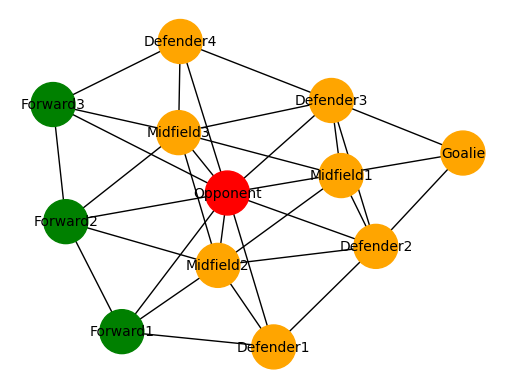

In [33]:
fig, ax = plt.subplots()
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=1000, node_color=[STATE2COLOR[G.nodes[node]["state"]] for node in G.nodes], font_size=10)

In [213]:
def update_state(G, node):
    # update states in G_copy to achieve simultaneous updates
    global GoalsPositive
    global GoalsNegative
    team_neighbor = []
    forward_neighbors = []
    opp_neighbors = []
    team_neighbor.clear()
    forward_neighbors.clear()
    neighbors = set(list(nx.all_neighbors(G,node)))
    for n in neighbors:
        if G.nodes[n]['state'] == State.TEAM:
            team_neighbors.append(n)
        elif G.nodes[n]['state'] == State.CANSHOOT:
            forward_neighbors.append(n)
    state = G.nodes[node]["state"]
    # case one:
    if state == State.TEAM: # if the node is a "team" node
        if G.nodes[node]["mistake"] > np.random.random(): #check whether player makes a mistake
            print("Team fumbles the pass, ball to opponent")
            return("Opponent")
        else:
            if G.nodes[node]["passing"] > np.random.random(): #check whether player passes to team
                print("Team passes to another teammate")
                return(random.choice(team_neighbors))
            else:
                print("Team passes to a forward shooter")
                return(random.choice(team_neighbors)) #ball goes to the forward
    # case two:
    elif state == State.CANSHOOT: # if the node is a "canshoot" node
        if G.nodes[node]["scoring"] > np.random.random():# check whether player scores
            GoalsPositive += 1
            print("Forward scores a goal! Ball now goes to the opponent")
            return("Opponent") #ball given to opponents
        else:
            print("Forward misses, ball caught by opponent")
            return("Opponent") #player misses, opponent takes the ball
    # case three:
    elif state == State.OPPONENT: # if the node is a "opponent" node
        if G.nodes[node]["mistake"] > np.random.random(): #check whether opponent makes a mistake
            print("Opponent fumbles the pass, ball to team")
            return(random.choice(team_neighbors)) #ball goes to the team
        else:
            if G.nodes[node]["passing"] > np.random.random(): #check whether opponent passes to opponent
                print("Opponent passes to opponent")
                return("Opponent") #ball goes to the opponent
            else:
                GoalsNegative += 1
                print("Opponent scores a goal! Ball now goes to the team")
                return(random.choice(team_neighbors)) #opponent scores

    else:
        print("Unsupported state, exit.")

In [228]:
GoalsPositive = 0
GoalsNegative = 0
GoalsTeam = 0
GoalsOpp = 0
node = "Opponent"
for _ in range(90):
    node = update_state(G, node)
print(GoalsPositive, GoalsNegative)

Opponent scores a goal! Ball now goes to the team
Team passes to another teammate
Team passes to another teammate
Team passes to another teammate
Team passes to a forward shooter
Team passes to another teammate
Team passes to another teammate
Team passes to another teammate
Team passes to another teammate
Team fumbles the pass, ball to opponent
Opponent passes to opponent
Opponent passes to opponent
Opponent fumbles the pass, ball to team
Team passes to another teammate
Team passes to another teammate
Team passes to another teammate
Team passes to another teammate
Team passes to another teammate
Team passes to another teammate
Team passes to another teammate
Team passes to a forward shooter
Team passes to another teammate
Team fumbles the pass, ball to opponent
Opponent passes to opponent
Opponent passes to opponent
Opponent fumbles the pass, ball to team
Team passes to another teammate
Team fumbles the pass, ball to opponent
Opponent fumbles the pass, ball to team
Team passes to a for

In [30]:
print(list(nx.all_neighbors(G,"Opponent")))

['Goalie', 'Defender1', 'Defender2', 'Defender3', 'Defender4', 'Midfield2', 'Midfield3', 'Forward1', 'Forward2', 'Forward3']


In [149]:
node = "Midfield2"
opp_neighbor = []
neighbors = set(list(nx.all_neighbors(G,node)))
for n in neighbors:
    if G.nodes[n]['state'] == State.OPPONENT:
        opp_neighbor.append(n)
print(random.choice(opp_neighbor))
opp_neighbor.clear()

Opponent
